In [57]:
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.ch_2_3 import preprocess, create_co_matrix, most_similar

In [58]:
def ppmi(C, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    row_num, col_num = C.shape
    N = np.sum(C)
    S = np.sum(C, axis=0)
    for i in range(row_num):
        for j in range(col_num):
            pmi = np.log2(C[i, j] * N / (S[i] * S[j]) + eps)
            M[i, j] = max(0, pmi)
    return M

In [59]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
C = create_co_matrix(corpus, len(word_to_id))
W = ppmi(C)
U, S, V = np.linalg.svd(W)

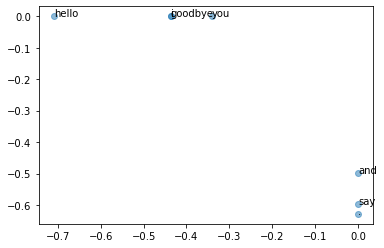

In [60]:
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()

In [61]:
from dataset import ptb
from sklearn.utils.extmath import randomized_svd

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
window_size = 2
wordvec_size = 100
C = create_co_matrix(corpus, vocab_size, window_size)
W = ppmi(C)
U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)
word_vecs = U[:, :wordvec_size]

C:\Users\xuyax\AppData\Local\Temp\ipykernel_18228\3187528609.py:8: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i, j] * N / (S[i] * S[j]) + eps)
C:\Users\xuyax\AppData\Local\Temp\ipykernel_18228\3187528609.py:8: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[i] * S[j]) + eps)


In [62]:
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs)


[query] you
i: 0.6449882984161377
we: 0.595940351486206
anybody: 0.5480700731277466
do: 0.5327110290527344
've: 0.5240918397903442

[query] year
month: 0.6396413445472717
last: 0.6309598088264465
quarter: 0.6180704832077026
earlier: 0.5887919664382935
june: 0.5786089897155762

[query] car
luxury: 0.6667635440826416
auto: 0.6209213137626648
truck: 0.6078695058822632
cars: 0.5655221939086914
corsica: 0.5647716522216797

[query] toyota
motor: 0.6984732747077942
motors: 0.6927098035812378
honda: 0.6485469937324524
lexus: 0.6453078985214233
nissan: 0.6396191120147705
